In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


# Uni-Variate Forecasting

In [4]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

In [5]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

17:35:45 - cmdstanpy - INFO - Chain [1] start processing
17:35:45 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
future_data = model.make_future_dataframe(periods=113, freq = 'D')

forecast_data = model.predict(future_data)
  
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550763,3.434183,3.671683
1571,2017-04-21,3.554532,3.429130,3.675622
1572,2017-04-22,3.554809,3.427584,3.674433
1573,2017-04-23,3.554178,3.434529,3.681271
1574,2017-04-24,3.571443,3.447022,3.702163


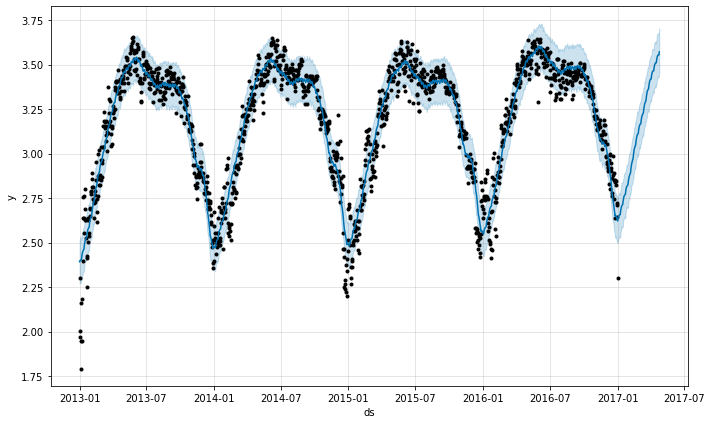

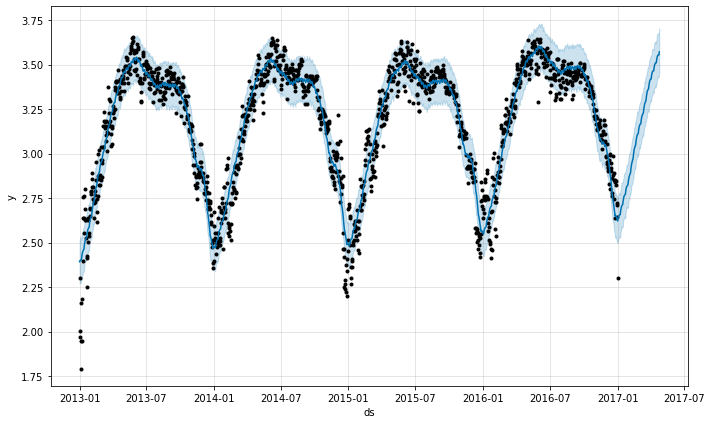

In [7]:
model.plot(forecast_data)

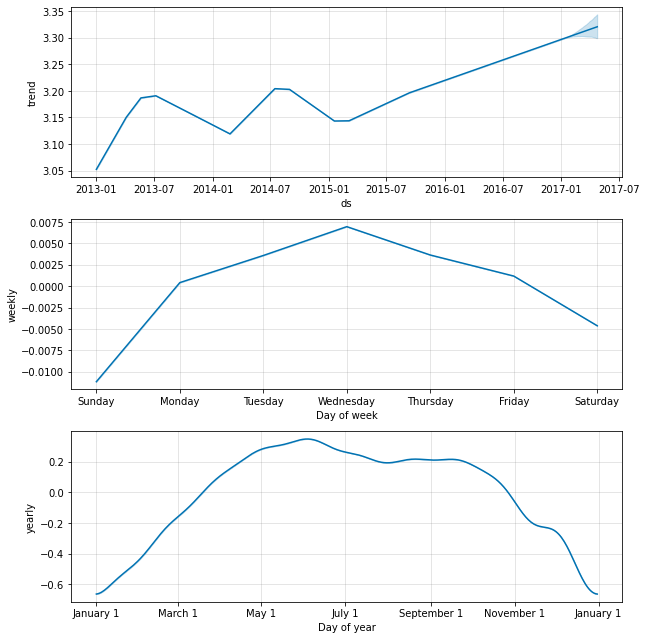

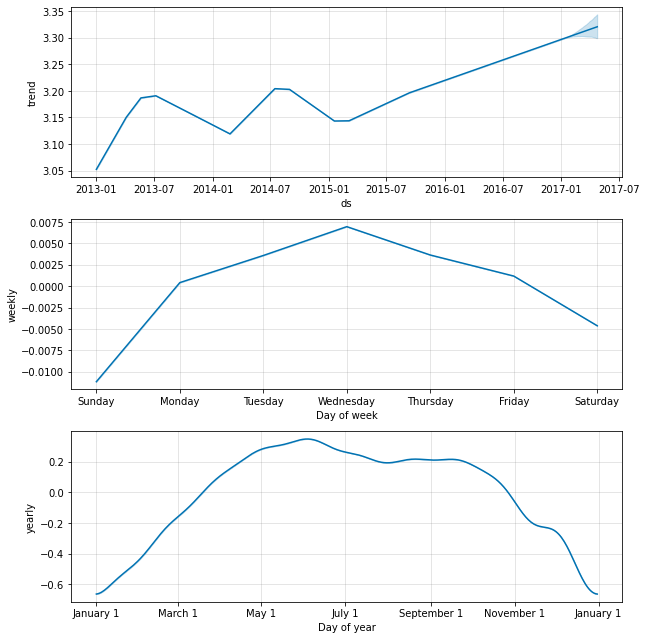

In [8]:
model.plot_components(forecast_data)

In [9]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

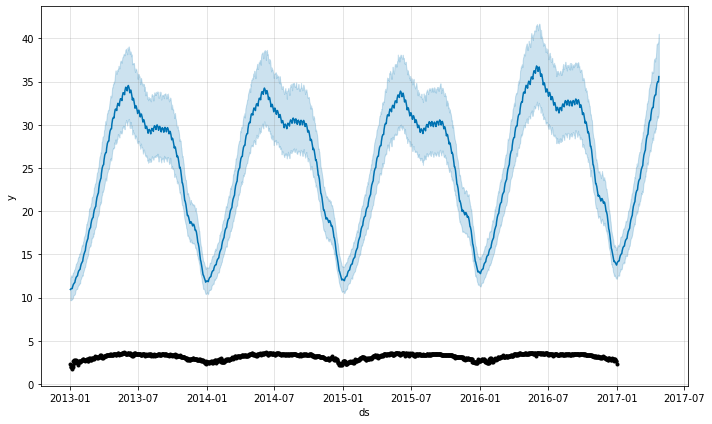

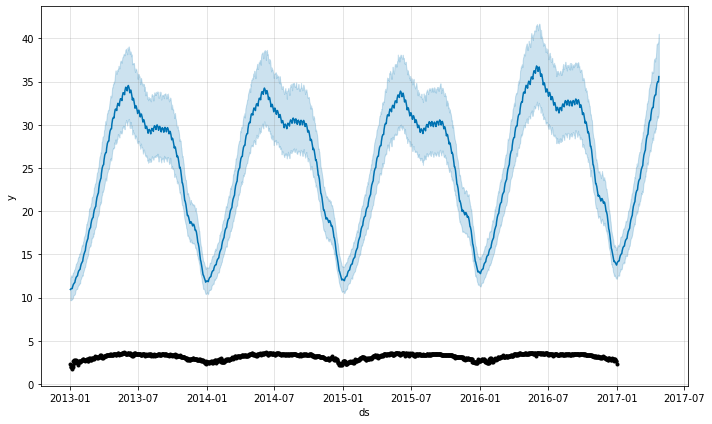

In [10]:
model.plot(forecast_data_orig)

In [11]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [12]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [13]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [14]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.296982,12.260097,15.695821,3.296982,3.296982,-0.661775,-0.661775,-0.661775,0.000418,0.000418,0.000418,-0.662193,-0.662193,-0.662193,0.0,0.0,0.0,13.946198
1463,2017-01-03,3.297193,12.405839,15.914509,3.297193,3.297193,-0.655751,-0.655751,-0.655751,0.003585,0.003585,0.003585,-0.659336,-0.659336,-0.659336,0.0,0.0,0.0,14.033416
1464,2017-01-04,3.297403,12.513364,15.917314,3.297403,3.297403,-0.648399,-0.648399,-0.648399,0.006953,0.006953,0.006953,-0.655352,-0.655352,-0.655352,0.0,0.0,0.0,14.139944
1465,2017-01-05,3.297613,12.560827,16.113009,3.297613,3.297613,-0.646730,-0.646730,-0.646730,0.003641,0.003641,0.003641,-0.650371,-0.650371,-0.650371,0.0,0.0,0.0,14.166541
1466,2017-01-06,3.297824,12.575260,16.009751,3.297824,3.297824,-0.643343,-0.643343,-0.643343,0.001182,0.001182,0.001182,-0.644525,-0.644525,-0.644525,0.0,0.0,0.0,14.217599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.319704,31.006066,39.318006,3.299525,3.341634,0.231059,0.231059,0.231059,0.003641,0.003641,0.003641,0.227418,0.227418,0.227418,0.0,0.0,0.0,34.839897
1571,2017-04-21,3.319914,30.849791,39.473187,3.299248,3.342351,0.234618,0.234618,0.234618,0.001182,0.001182,0.001182,0.233436,0.233436,0.233436,0.0,0.0,0.0,34.971447
1572,2017-04-22,3.320125,30.802120,39.426284,3.299186,3.343005,0.234685,0.234685,0.234685,-0.004622,-0.004622,-0.004622,0.239307,0.239307,0.239307,0.0,0.0,0.0,34.981153
1573,2017-04-23,3.320335,31.016785,39.696825,3.299164,3.343519,0.233843,0.233843,0.233843,-0.011156,-0.011156,-0.011156,0.244999,0.244999,0.244999,0.0,0.0,0.0,34.959061


In [15]:
rows = final_df["yhat"].tail(113)

In [16]:
rows = rows.reset_index()

In [17]:
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

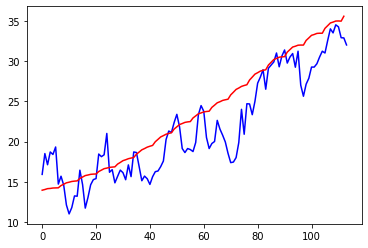

In [18]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')   
plt.plot(rows, color='red')
plt.show()



# Multi-Variate Forecasting



In [20]:
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [21]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [22]:
model_new.fit(df_train)

17:44:02 - cmdstanpy - INFO - Chain [1] start processing
17:44:02 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

In [24]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [25]:
df=df.append(df_test)
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [26]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [28]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1566,2017-04-15,3.542711,3.436468,3.648612
1567,2017-04-16,3.526025,3.413912,3.634638
1568,2017-04-17,3.512388,3.408331,3.619198
1569,2017-04-18,3.567586,3.451770,3.669644
1570,2017-04-19,3.586366,3.466745,3.695039
1571,2017-04-20,3.574940,3.464673,3.688958
1572,2017-04-21,3.523721,3.414509,3.634274
1573,2017-04-22,3.519656,3.407605,3.625902
1574,2017-04-23,3.578843,3.464262,3.690009
1575,2017-04-24,3.589760,3.484716,3.695024


In [29]:
## full forecast_data
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.037421,2.245600,2.463295,3.037421,3.037421,-0.686168,-0.686168,-0.686168,-0.102079,...,0.009572,0.009572,0.009572,-0.586766,-0.586766,-0.586766,0.0,0.0,0.0,2.351253
1,2013-01-02,3.038523,2.215191,2.429898,3.038523,3.038523,-0.721434,-0.721434,-0.721434,-0.141569,...,0.005379,0.005379,0.005379,-0.583546,-0.583546,-0.583546,0.0,0.0,0.0,2.317089
2,2013-01-03,3.039625,2.237133,2.450737,3.039625,3.039625,-0.700861,-0.700861,-0.700861,-0.120383,...,0.003052,0.003052,0.003052,-0.579055,-0.579055,-0.579055,0.0,0.0,0.0,2.338764
3,2013-01-04,3.040727,2.317540,2.534489,3.040727,3.040727,-0.615049,-0.615049,-0.615049,-0.041892,...,0.007837,0.007837,0.007837,-0.573441,-0.573441,-0.573441,0.0,0.0,0.0,2.425678
4,2013-01-05,3.041829,2.249573,2.465040,3.041829,3.041829,-0.684129,-0.684129,-0.684129,-0.118268,...,0.004366,0.004366,0.004366,-0.566864,-0.566864,-0.566864,0.0,0.0,0.0,2.357699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.309562,3.464673,3.688958,3.294332,3.328580,0.265378,0.265378,0.265378,0.158350,...,0.001745,0.001745,0.001745,0.108451,0.108451,0.108451,0.0,0.0,0.0,3.574940
1572,2017-04-21,3.309764,3.414509,3.634274,3.294222,3.329327,0.213957,0.213957,0.213957,0.100512,...,-0.000226,-0.000226,-0.000226,0.113162,0.113162,0.113162,0.0,0.0,0.0,3.523721
1573,2017-04-22,3.309965,3.407605,3.625902,3.294222,3.329780,0.209691,0.209691,0.209691,0.090612,...,-0.002938,-0.002938,-0.002938,0.118076,0.118076,0.118076,0.0,0.0,0.0,3.519656
1574,2017-04-23,3.310167,3.464262,3.690009,3.294243,3.330244,0.268676,0.268676,0.268676,0.152130,...,-0.004447,-0.004447,-0.004447,0.123144,0.123144,0.123144,0.0,0.0,0.0,3.578843


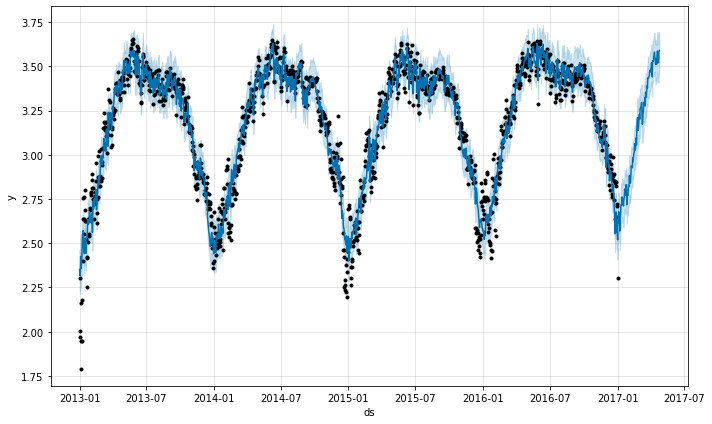

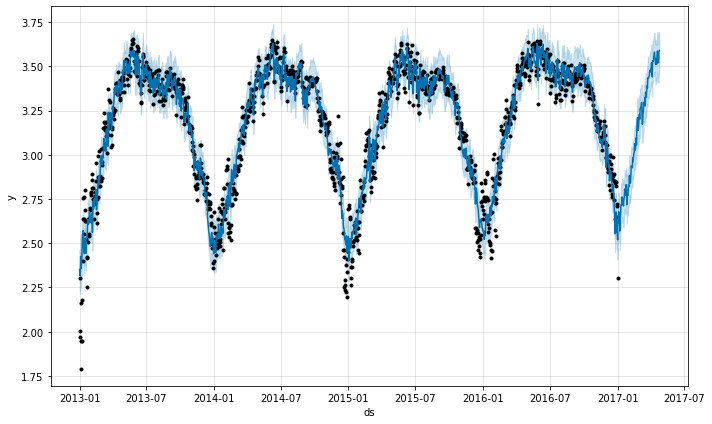

In [30]:
model_new.plot(forecast_data)

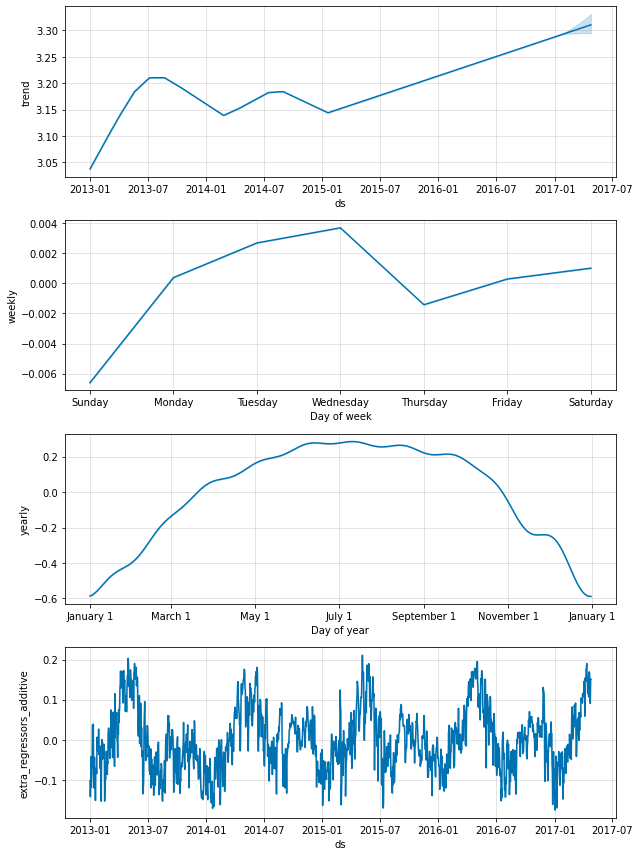

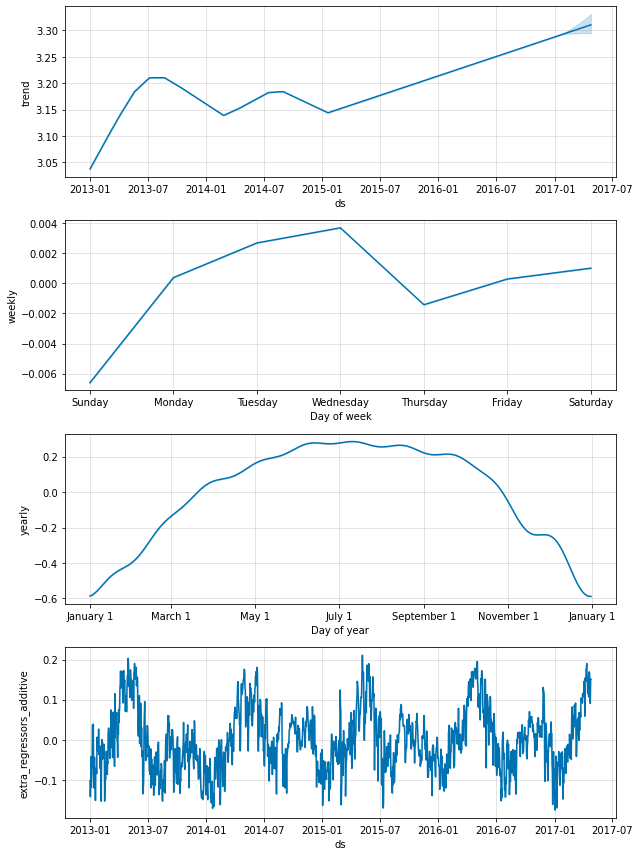

In [31]:
model_new.plot_components(forecast_data)

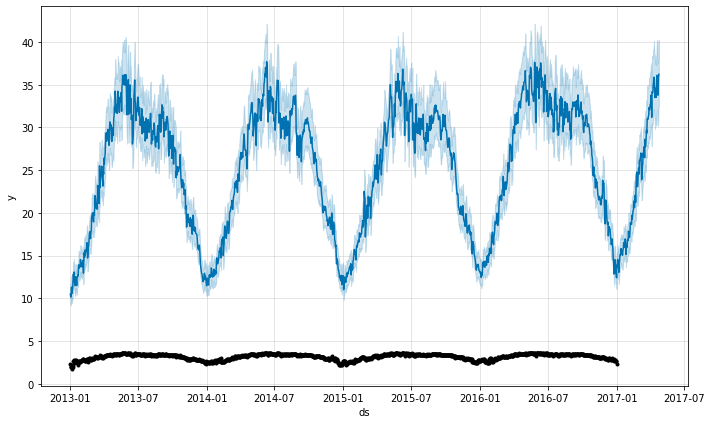

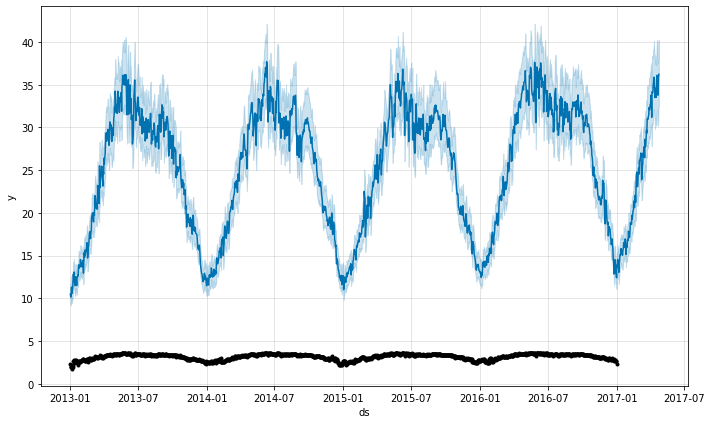

In [32]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [33]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [34]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'